In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #for creating plots
from scipy import stats
import seaborn as sns #for styling the plots
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline 

#including the distributions
from scipy.stats import norm #normal
from scipy.stats import genextreme as gev #generalized extreme value
from scipy.stats import pareto #pareto


In [ ]:
#!pip install --upgrade geopandas

In [ ]:
#!pip install --upgrade pyshp

#!pip install --upgrade shapely

#!pip install --upgrade descartes

In [ ]:
url = "20182019ROLLINGFormatted.csv"
precovid = pd.read_csv(url)

In [ ]:
url2 = "20202021ROLLINGFormatted.csv"
covid = pd.read_csv(url2)

In [ ]:
precovid.head()

,Unnamed: 0,BOROUGH\n,NEIGHBORHOOD\n,BUILDING CLASS CATEGORY\n,TAX CLASS AS OF FINAL ROLL 18/19,BLOCK\n,LOT\n,EASE-MENT\n,BUILDING CLASS AS OF FINAL ROLL 18/19,ADDRESS\n,...,RESIDENTIAL UNITS\n,COMMERCIAL UNITS\n,TOTAL UNITS\n,LAND SQUARE FEET\n,GROSS SQUARE FEET\n,YEAR BUILT\n,TAX CLASS AT TIME OF SALE\n,BUILDING CLASS AT TIME OF SALE\n,SALE PRICE\n,SALE DATE\n
0,0,1,ALPHABET CITY,01 ONE FAMILY DWELLINGS,1,390,61,NaN,A4,189 EAST 7TH STREET,...,1.0,0.0,1.0,987.0,2183.0,1860.0,1,A4,0,2018-05-23 00:00:00
1,1,1,ALPHABET CITY,01 ONE FAMILY DWELLINGS,1,390,61,NaN,A4,189 EAST 7TH STREET,...,1.0,0.0,1.0,987.0,2183.0,1860.0,1,A4,4844809,2018-05-22 00:00:00
2,2,1,ALPHABET CITY,01 ONE FAMILY DWELLINGS,1,400,19,NaN,A4,526 EAST 5TH STREET,...,1.0,0.0,1.0,1883.0,5200.0,1900.0,1,A4,6100000,2018-12-03 00:00:00
3,3,1,ALPHABET CITY,02 TWO FAMILY DWELLINGS,1,390,35,NaN,B1,113 AVENUE C,...,2.0,0.0,2.0,1218.0,4764.0,1899.0,1,B1,0,2018-04-25 00:00:00
4,4,1,ALPHABET CITY,02 TWO FAMILY DWELLINGS,1,404,1,NaN,B9,166 AVENUE A,...,2.0,0.0,2.0,1510.0,4520.0,1900.0,1,B9,0,2018-11-29 00:00:00


In [ ]:
precovid.columns

Index(['Unnamed: 0', 'BOROUGH\n', 'NEIGHBORHOOD\n',
       'BUILDING CLASS CATEGORY\n', 'TAX CLASS AS OF FINAL ROLL 18/19',
       'BLOCK\n', 'LOT\n', 'EASE-MENT\n',
       'BUILDING CLASS AS OF FINAL ROLL 18/19', 'ADDRESS\n',
       'APARTMENT NUMBER\n', 'ZIP CODE\n', 'RESIDENTIAL UNITS\n',
       'COMMERCIAL UNITS\n', 'TOTAL UNITS\n', 'LAND SQUARE FEET\n',
       'GROSS SQUARE FEET\n', 'YEAR BUILT\n', 'TAX CLASS AT TIME OF SALE\n',
       'BUILDING CLASS AT TIME OF SALE\n', 'SALE PRICE\n', 'SALE DATE\n'],
      dtype='object')

In [ ]:
precovid.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
precovid.head()

,BOROUGH\n,NEIGHBORHOOD\n,BUILDING CLASS CATEGORY\n,TAX CLASS AS OF FINAL ROLL 18/19,BLOCK\n,LOT\n,EASE-MENT\n,BUILDING CLASS AS OF FINAL ROLL 18/19,ADDRESS\n,APARTMENT NUMBER\n,...,RESIDENTIAL UNITS\n,COMMERCIAL UNITS\n,TOTAL UNITS\n,LAND SQUARE FEET\n,GROSS SQUARE FEET\n,YEAR BUILT\n,TAX CLASS AT TIME OF SALE\n,BUILDING CLASS AT TIME OF SALE\n,SALE PRICE\n,SALE DATE\n
0,1,ALPHABET CITY,01 ONE FAMILY DWELLINGS,1,390,61,NaN,A4,189 EAST 7TH STREET,NaN,...,1.0,0.0,1.0,987.0,2183.0,1860.0,1,A4,0,2018-05-23 00:00:00
1,1,ALPHABET CITY,01 ONE FAMILY DWELLINGS,1,390,61,NaN,A4,189 EAST 7TH STREET,NaN,...,1.0,0.0,1.0,987.0,2183.0,1860.0,1,A4,4844809,2018-05-22 00:00:00
2,1,ALPHABET CITY,01 ONE FAMILY DWELLINGS,1,400,19,NaN,A4,526 EAST 5TH STREET,NaN,...,1.0,0.0,1.0,1883.0,5200.0,1900.0,1,A4,6100000,2018-12-03 00:00:00
3,1,ALPHABET CITY,02 TWO FAMILY DWELLINGS,1,390,35,NaN,B1,113 AVENUE C,NaN,...,2.0,0.0,2.0,1218.0,4764.0,1899.0,1,B1,0,2018-04-25 00:00:00
4,1,ALPHABET CITY,02 TWO FAMILY DWELLINGS,1,404,1,NaN,B9,166 AVENUE A,NaN,...,2.0,0.0,2.0,1510.0,4520.0,1900.0,1,B9,0,2018-11-29 00:00:00


In [ ]:
 precovid.columns = precovid.columns.str.replace('\n', '')
  #precovid

In [ ]:
covid.drop('Unnamed: 0', axis=1, inplace=True)

covid.columns = precovid.columns.str.replace('\n', '')
#covid

dropping columns that will not be used for analysis 

In [ ]:
cf = ["EASE-MENT","APARTMENT NUMBER", "ADDRESS", "TAX CLASS AT TIME OF SALE", "BUILDING CLASS AT TIME OF SALE", "BUILDING CLASS AS OF FINAL ROLL 18/19", "BLOCK","LOT","TAX CLASS AS OF FINAL ROLL 18/19"]
covid.drop(cf,axis=1,inplace = True)
covid.columns

Index(['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'ZIP CODE',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT', 'SALE PRICE',
       'SALE DATE'],
      dtype='object')

In [ ]:
cf = ["EASE-MENT","APARTMENT NUMBER", "ADDRESS", "TAX CLASS AT TIME OF SALE", "BUILDING CLASS AT TIME OF SALE", "BUILDING CLASS AS OF FINAL ROLL 18/19","BLOCK","LOT","TAX CLASS AS OF FINAL ROLL 18/19"]
precovid.drop(cf,axis=1,inplace = True)
precovid.columns

Index(['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'ZIP CODE',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT', 'SALE PRICE',
       'SALE DATE'],
      dtype='object')

In [ ]:
#covid.corr()

In [ ]:
#precovid.corr()

converting date to timestamp 

In [ ]:
covid['SALE DATE'] = pd.to_datetime(covid['SALE DATE'])


In [ ]:
precovid['SALE DATE'] = pd.to_datetime(precovid['SALE DATE'])


extracting month and date

In [ ]:
covid['Year'] = covid['SALE DATE'].dt.year
covid['Month'] = covid['SALE DATE'].dt.month
precovid['Year'] = precovid['SALE DATE'].dt.year
precovid['Month'] = precovid['SALE DATE'].dt.month

In [ ]:
precovid.describe()

,BOROUGH,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE,Year,Month
count,167702.000000,167686.000000,150476.000000,150476.000000,150476.000000,1.504750e+05,1.504760e+05,161675.000000,1.677020e+05,167702.000000,167702.000000
mean,3.010829,10830.181190,2.051576,0.267465,2.360609,5.236157e+03,3.121246e+03,1871.624803,1.272564e+06,2018.500411,6.538139
std,1.283106,780.713895,13.330171,5.676619,14.626958,8.058476e+04,2.508610e+04,385.041415,1.304334e+07,0.500001,3.393809
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,2018.000000,1.000000
25%,2.000000,10306.000000,1.000000,0.000000,1.000000,0.000000e+00,0.000000e+00,1920.000000,0.000000e+00,2018.000000,4.000000
50%,3.000000,11209.000000,1.000000,0.000000,1.000000,2.002000e+03,1.386000e+03,1940.000000,4.450000e+05,2019.000000,6.500000
75%,4.000000,11358.000000,2.000000,0.000000,2.000000,3.280000e+03,2.275000e+03,1968.000000,8.550000e+05,2019.000000,9.000000
max,5.000000,11697.000000,2229.000000,1132.000000,2229.000000,1.985040e+07,2.400000e+06,2020.000000,2.397502e+09,2019.000000,12.000000


In [ ]:
precovid.shape

(167702, 14)

#Sanity checks for precovid (2018&2019)

In [ ]:
(precovid['SALE PRICE']==0).sum()

51866

In [ ]:
(precovid['ZIP CODE']<10000).sum()

423

In [ ]:
final_precovid = precovid.loc[(precovid['ZIP CODE'] > 0) & (precovid['YEAR BUILT'] > 0) & (precovid['SALE PRICE'] > 0)]

In [ ]:
(precovid['GROSS SQUARE FEET']==0).sum()


40585

In [ ]:
(precovid['LAND SQUARE FEET']==0).sum()


46016

In [ ]:
final_precovid.shape

(108241, 14)

In [ ]:
final_covid = covid.loc[(covid['ZIP CODE'] > 0) & (covid['YEAR BUILT'] > 0) & (covid['SALE PRICE'] > 0)]
final_covid.shape

(109208, 14)

In [ ]:
covid2020 = final_covid.loc[final_covid['Year']== 2020].reset_index(drop = True)
covid2020


,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE,SALE DATE,Year,Month
0,1,ALPHABET CITY,03 THREE FAMILY DWELLINGS,10009.0,3.0,0.0,3.0,2381.0,3084.0,1899.0,4350000,2020-07-16,2020,7
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,10009.0,8.0,2.0,10.0,1501.0,6929.0,1900.0,3672530,2020-11-24,2020,11
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,10009.0,24.0,0.0,24.0,2764.0,13206.0,1900.0,1,2020-06-26,2020,6
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,10009.0,19.0,0.0,19.0,2772.0,13248.0,1920.0,2500,2020-02-11,2020,2
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,10009.0,19.0,0.0,19.0,2772.0,13248.0,1920.0,290000,2020-02-07,2020,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41990,5,WOODROW,02 TWO FAMILY DWELLINGS,10309.0,2.0,0.0,2.0,2590.0,1850.0,1998.0,665000,2020-04-23,2020,4
41991,5,WOODROW,02 TWO FAMILY DWELLINGS,10309.0,2.0,0.0,2.0,5235.0,2400.0,2000.0,775000,2020-11-10,2020,11
41992,5,WOODROW,02 TWO FAMILY DWELLINGS,10309.0,2.0,0.0,2.0,2385.0,2250.0,2001.0,500000,2020-06-18,2020,6
41993,5,WOODROW,02 TWO FAMILY DWELLINGS,10309.0,2.0,0.0,2.0,2728.0,1980.0,2001.0,537000,2020-09-25,2020,9


In [ ]:
covid2021 = final_covid.loc[final_covid['Year']== 2021].reset_index(drop = True)
covid2021

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE,SALE DATE,Year,Month
0,1,ALPHABET CITY,01 ONE FAMILY DWELLINGS,10009.0,1.0,0.0,1.0,2116.0,4400.0,1900.0,2385000,2021-02-09,2021,2
1,1,ALPHABET CITY,02 TWO FAMILY DWELLINGS,10009.0,2.0,0.0,2.0,882.0,2160.0,2003.0,3025000,2021-12-16,2021,12
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,10009.0,20.0,0.0,20.0,2302.0,9750.0,1900.0,154196,2021-06-11,2021,6
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,10009.0,29.0,0.0,29.0,3927.0,17754.0,1910.0,7500000,2021-06-14,2021,6
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,10009.0,10.0,1.0,11.0,1600.0,5320.0,1910.0,3425000,2021-02-11,2021,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67208,5,WOODROW,02 TWO FAMILY DWELLINGS,10309.0,2.0,0.0,2.0,2540.0,2007.0,1998.0,675000,2021-08-27,2021,8
67209,5,WOODROW,02 TWO FAMILY DWELLINGS,10309.0,2.0,0.0,2.0,2438.0,2178.0,1999.0,219973,2021-02-12,2021,2
67210,5,WOODROW,02 TWO FAMILY DWELLINGS,10309.0,2.0,0.0,2.0,2645.0,2250.0,2001.0,550000,2021-02-03,2021,2
67211,5,WOODROW,02 TWO FAMILY DWELLINGS,10309.0,2.0,0.0,2.0,2562.0,2565.0,2001.0,638500,2021-03-26,2021,3


In [ ]:
precovid2018 = final_precovid.loc[final_precovid['Year']== 2018].reset_index(drop = True)
precovid2018

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE,SALE DATE,Year,Month
0,1,ALPHABET CITY,01 ONE FAMILY DWELLINGS,10009.0,1.0,0.0,1.0,987.0,2183.0,1860.0,4844809,2018-05-22,2018,5
1,1,ALPHABET CITY,01 ONE FAMILY DWELLINGS,10009.0,1.0,0.0,1.0,1883.0,5200.0,1900.0,6100000,2018-12-03,2018,12
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,10009.0,20.0,2.0,22.0,3481.0,14588.0,1930.0,8300000,2018-12-10,2018,12
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,10009.0,12.0,4.0,16.0,4186.0,10588.0,1900.0,10350000,2018-09-07,2018,9
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,10009.0,18.0,0.0,18.0,2271.0,10650.0,1910.0,5000000,2018-09-05,2018,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54594,5,WOODROW,02 TWO FAMILY DWELLINGS,10309.0,2.0,0.0,2.0,3720.0,1850.0,1998.0,680000,2018-11-28,2018,11
54595,5,WOODROW,05 TAX CLASS 1 VACANT LAND,10309.0,0.0,0.0,0.0,4427.0,0.0,2018.0,793216,2018-05-25,2018,5
54596,5,WOODROW,05 TAX CLASS 1 VACANT LAND,10309.0,1.0,0.0,1.0,2955.0,2612.0,2018.0,671026,2018-10-04,2018,10
54597,5,WOODROW,05 TAX CLASS 1 VACANT LAND,10309.0,1.0,0.0,1.0,4108.0,2612.0,2018.0,610950,2018-07-23,2018,7


In [ ]:
precovid2019 = final_precovid.loc[final_precovid['Year']== 2019].reset_index(drop = True)
precovid2019

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE,SALE DATE,Year,Month
0,1,ALPHABET CITY,01 ONE FAMILY DWELLINGS,10009.0,1.0,1.0,2.0,2090.0,3680.0,1940.0,3200000,2019-07-24,2019,7
1,1,ALPHABET CITY,03 THREE FAMILY DWELLINGS,10009.0,3.0,0.0,3.0,2430.0,3600.0,1899.0,6300000,2019-04-30,2019,4
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,10009.0,12.0,0.0,12.0,2393.0,7989.0,2001.0,1950000,2019-08-08,2019,8
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,10009.0,28.0,2.0,30.0,4651.0,17478.0,1920.0,14000000,2019-01-09,2019,1
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,10009.0,4.0,0.0,4.0,2059.0,4154.0,1900.0,600000,2019-12-12,2019,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53637,5,WOODROW,02 TWO FAMILY DWELLINGS,10309.0,2.0,0.0,2.0,2340.0,2160.0,2001.0,610000,2019-08-06,2019,8
53638,5,WOODROW,02 TWO FAMILY DWELLINGS,10309.0,2.0,0.0,2.0,2730.0,2565.0,2001.0,625000,2019-07-30,2019,7
53639,5,WOODROW,02 TWO FAMILY DWELLINGS,10309.0,2.0,0.0,2.0,8846.0,1710.0,2001.0,637500,2019-08-20,2019,8
53640,5,WOODROW,05 TAX CLASS 1 VACANT LAND,10309.0,2.0,0.0,2.0,0.0,0.0,2018.0,599701,2019-04-24,2019,4


In [ ]:
pre_c = final_precovid.groupby(['ZIP CODE','BOROUGH']).agg({'SALE PRICE':'sum','GROSS SQUARE FEET':'sum'}).reset_index()
pre_c['PRICE_PER_SQ_FT'] = pre_c['SALE PRICE']/pre_c['GROSS SQUARE FEET']
pre_c

,ZIP CODE,BOROUGH,SALE PRICE,GROSS SQUARE FEET,PRICE_PER_SQ_FT
0,10001.0,1,7139723097,5039601.0,1416.723883
1,10002.0,1,2399074908,1111093.0,2159.202612
2,10003.0,1,3483942652,1882245.0,1850.950674
3,10004.0,1,686189841,1384772.0,495.525502
4,10005.0,1,301119201,161052.0,1869.701717
...,...,...,...,...,...
181,11691.0,4,1381994003,1788845.0,772.562186
182,11692.0,4,114255370,415214.0,275.172249
183,11693.0,4,88623131,299747.0,295.659776
184,11694.0,4,285798379,682839.0,418.544311


In [ ]:
pre_c.rename(columns = {'SALE PRICE': 'SALE_18_19',	'GROSS SQUARE FEET':'GSF_18_19',	'PRICE_PER_SQ_FT':'PPSF_18_19'}, inplace= True)
pre_c.columns

Index(['ZIP CODE', 'BOROUGH', 'SALE_18_19', 'GSF_18_19', 'PPSF_18_19'], dtype='object')

In [ ]:
ZIP2018_19 = pre_c['ZIP CODE'].unique()
print(ZIP2018_19)


[10001. 10002. 10003. 10004. 10005. 10006. 10007. 10009. 10010. 10011.
 10012. 10013. 10014. 10016. 10017. 10018. 10019. 10020. 10021. 10022.
 10023. 10024. 10025. 10026. 10027. 10028. 10029. 10030. 10031. 10032.
 10033. 10034. 10035. 10036. 10037. 10038. 10039. 10040. 10044. 10065.
 10069. 10075. 10128. 10280. 10282. 10301. 10302. 10303. 10304. 10305.
 10306. 10307. 10308. 10309. 10310. 10312. 10314. 10451. 10452. 10453.
 10454. 10455. 10456. 10457. 10458. 10459. 10460. 10461. 10462. 10463.
 10464. 10465. 10466. 10467. 10468. 10469. 10470. 10471. 10472. 10473.
 10474. 10475. 11001. 11004. 11005. 11040. 11101. 11102. 11103. 11104.
 11105. 11106. 11109. 11201. 11203. 11204. 11205. 11206. 11207. 11208.
 11209. 11210. 11211. 11212. 11213. 11214. 11215. 11216. 11217. 11218.
 11219. 11220. 11221. 11222. 11223. 11224. 11225. 11226. 11227. 11228.
 11229. 11230. 11231. 11232. 11233. 11234. 11235. 11236. 11237. 11238.
 11239. 11249. 11351. 11354. 11355. 11356. 11357. 11358. 11360. 11361.
 11362

LOGGING DATA ERRORS FOR 0 GROSS SQUARE FEET GIVING INFINITY PRICE PER SQFT

In [ ]:
pre_c0 = pre_c.loc[pre_c['GSF_18_19']==0]
pre_c0

,ZIP CODE,BOROUGH,SALE_18_19,GSF_18_19,PPSF_18_19
85,11005.0,4,130432157,0.0,inf
133,11351.0,4,38773568,0.0,inf
185,11697.0,4,79923950,0.0,inf


In [ ]:
test = final_precovid.loc[(final_precovid['ZIP CODE']== 11005)]
test

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE,SALE DATE,Year,Month
108955,4,GLEN OAKS,10 COOPS - ELEVATOR APARTMENTS,11005.0,0.0,0.0,0.0,0.0,0.0,1972.0,380000,2018-01-11,2018,1
108957,4,GLEN OAKS,10 COOPS - ELEVATOR APARTMENTS,11005.0,0.0,0.0,0.0,0.0,0.0,1972.0,280000,2018-01-17,2018,1
108958,4,GLEN OAKS,10 COOPS - ELEVATOR APARTMENTS,11005.0,0.0,0.0,0.0,0.0,0.0,1972.0,600000,2018-01-18,2018,1
108959,4,GLEN OAKS,10 COOPS - ELEVATOR APARTMENTS,11005.0,0.0,0.0,0.0,0.0,0.0,1972.0,803500,2018-01-25,2018,1
108960,4,GLEN OAKS,10 COOPS - ELEVATOR APARTMENTS,11005.0,0.0,0.0,0.0,0.0,0.0,1972.0,445000,2018-01-26,2018,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135441,4,GLEN OAKS,10 COOPS - ELEVATOR APARTMENTS,11005.0,NaN,NaN,NaN,NaN,NaN,1972.0,435000,2019-07-02,2019,7
135442,4,GLEN OAKS,10 COOPS - ELEVATOR APARTMENTS,11005.0,NaN,NaN,NaN,NaN,NaN,1972.0,430000,2019-12-10,2019,12
135443,4,GLEN OAKS,10 COOPS - ELEVATOR APARTMENTS,11005.0,NaN,NaN,NaN,NaN,NaN,1972.0,425000,2019-02-15,2019,2
135444,4,GLEN OAKS,10 COOPS - ELEVATOR APARTMENTS,11005.0,NaN,NaN,NaN,NaN,NaN,1972.0,420000,2019-05-30,2019,5


In [ ]:
##test = final_precovid.loc[(final_precovid['ZIP CODE']== 11351)]
##test

In [ ]:
##test = final_precovid.loc[(final_precovid['ZIP CODE']== 11697)]
##test

In [ ]:
##filter = pre_c[pre_c['ZIP CODE'].isin([11005,11351,11697])]
##filter.shape

DROPPING ZIPCODES 11005, 11697, 11351

In [ ]:
pos_2020 = covid2020.groupby(['ZIP CODE','BOROUGH']).agg({'SALE PRICE':'sum','GROSS SQUARE FEET':'sum'}).reset_index()
pos_2020['PRICE_PER_SQ_FT'] = pos_2020['SALE PRICE']/pos_2020['GROSS SQUARE FEET']
pos_2020

,ZIP CODE,BOROUGH,SALE PRICE,GROSS SQUARE FEET,PRICE_PER_SQ_FT
0,10001.0,1,1488992810,1432696.0,1039.294316
1,10002.0,1,794280398,788483.0,1007.352597
2,10003.0,1,1075619785,267725.0,4017.629228
3,10004.0,1,91641664,0.0,inf
4,10005.0,1,276361830,295849.0,934.131364
...,...,...,...,...,...
185,11691.0,4,159382070,576262.0,276.579178
186,11692.0,4,249857573,276216.0,904.573135
187,11693.0,4,33877634,82371.0,411.281082
188,11694.0,4,122094130,264359.0,461.849720


In [ ]:
pos_2020.rename(columns = {'SALE PRICE': 'SALE_20',	'GROSS SQUARE FEET':'GSF_20',	'PRICE_PER_SQ_FT':'PPSF_20'}, inplace= True)
pos_2020.columns

Index(['ZIP CODE', 'BOROUGH', 'SALE_20', 'GSF_20', 'PPSF_20'], dtype='object')

In [ ]:
ZIP2020 = pos_2020['ZIP CODE'].unique()
print(ZIP2020)

[10001. 10002. 10003. 10004. 10005. 10006. 10007. 10009. 10010. 10011.
 10012. 10013. 10014. 10016. 10017. 10018. 10019. 10021. 10022. 10023.
 10024. 10025. 10026. 10027. 10028. 10029. 10030. 10031. 10032. 10033.
 10034. 10035. 10036. 10037. 10038. 10039. 10040. 10044. 10065. 10069.
 10075. 10128. 10167. 10169. 10170. 10171. 10172. 10177. 10179. 10280.
 10282. 10301. 10302. 10303. 10304. 10305. 10306. 10307. 10308. 10309.
 10310. 10312. 10314. 10451. 10452. 10453. 10454. 10455. 10456. 10457.
 10458. 10459. 10460. 10461. 10462. 10463. 10464. 10465. 10466. 10467.
 10468. 10469. 10470. 10471. 10472. 10473. 10474. 10475. 11001. 11004.
 11005. 11040. 11101. 11102. 11103. 11104. 11105. 11106. 11109. 11201.
 11203. 11204. 11205. 11206. 11207. 11208. 11209. 11210. 11211. 11212.
 11213. 11214. 11215. 11216. 11217. 11218. 11219. 11220. 11221. 11222.
 11223. 11224. 11225. 11226. 11228. 11229. 11230. 11231. 11232. 11233.
 11234. 11235. 11236. 11237. 11238. 11239. 11249. 11351. 11354. 11355.
 11356

In [ ]:
pos_2021 = covid2021.groupby(['ZIP CODE','BOROUGH']).agg({'SALE PRICE':'sum','GROSS SQUARE FEET':'sum'}).reset_index()
pos_2021['PRICE_PER_SQ_FT'] = pos_2021['SALE PRICE']/pos_2021['GROSS SQUARE FEET']
pos_2021


,ZIP CODE,BOROUGH,SALE PRICE,GROSS SQUARE FEET,PRICE_PER_SQ_FT
0,10001.0,1,3607384395,1505854.0,2395.573804
1,10002.0,1,1138860960,509772.0,2234.059462
2,10003.0,1,2207487437,674560.0,3272.484934
3,10004.0,1,594492945,165765.0,3586.359877
4,10005.0,1,451253557,990250.0,455.696599
...,...,...,...,...,...
181,11691.0,4,295662440,730159.0,404.928844
182,11692.0,4,62135348,196548.0,316.133199
183,11693.0,4,51974711,119248.0,435.853943
184,11694.0,4,191073065,282492.0,676.383986


In [ ]:
pos_2021.rename(columns = {'SALE PRICE': 'SALE_21',	'GROSS SQUARE FEET':'GSF_21',	'PRICE_PER_SQ_FT':'PPSF_21'}, inplace= True)
pos_2021.columns

Index(['ZIP CODE', 'BOROUGH', 'SALE_21', 'GSF_21', 'PPSF_21'], dtype='object')

In [ ]:
ZIP2021 = pos_2021['ZIP CODE'].unique()
print(ZIP2021)

[10001. 10002. 10003. 10004. 10005. 10006. 10007. 10009. 10010. 10011.
 10012. 10013. 10014. 10016. 10017. 10018. 10019. 10020. 10021. 10022.
 10023. 10024. 10025. 10026. 10027. 10028. 10029. 10030. 10031. 10032.
 10033. 10034. 10035. 10036. 10037. 10038. 10039. 10040. 10041. 10044.
 10065. 10069. 10075. 10128. 10280. 10282. 10301. 10302. 10303. 10304.
 10305. 10306. 10307. 10308. 10309. 10310. 10312. 10314. 10451. 10452.
 10453. 10454. 10455. 10456. 10457. 10458. 10459. 10460. 10461. 10462.
 10463. 10464. 10465. 10466. 10467. 10468. 10469. 10470. 10471. 10472.
 10473. 10474. 10475. 11001. 11004. 11005. 11040. 11101. 11102. 11103.
 11104. 11105. 11106. 11109. 11201. 11203. 11204. 11205. 11206. 11207.
 11208. 11209. 11210. 11211. 11212. 11213. 11214. 11215. 11216. 11217.
 11218. 11219. 11220. 11221. 11222. 11223. 11224. 11225. 11226. 11228.
 11229. 11230. 11231. 11232. 11233. 11234. 11235. 11236. 11237. 11238.
 11239. 11249. 11351. 11354. 11355. 11356. 11357. 11358. 11360. 11361.
 11362

In [ ]:
change_zip = pre_c.merge(pos_2020, on =['ZIP CODE','BOROUGH'])
change_zip_f = change_zip.merge(pos_2021, on =['ZIP CODE','BOROUGH'])
change_zip_f

,ZIP CODE,BOROUGH,SALE_18_19,GSF_18_19,PPSF_18_19,SALE_20,GSF_20,PPSF_20,SALE_21,GSF_21,PPSF_21
0,10001.0,1,7139723097,5039601.0,1416.723883,1488992810,1432696.0,1039.294316,3607384395,1505854.0,2395.573804
1,10002.0,1,2399074908,1111093.0,2159.202612,794280398,788483.0,1007.352597,1138860960,509772.0,2234.059462
2,10003.0,1,3483942652,1882245.0,1850.950674,1075619785,267725.0,4017.629228,2207487437,674560.0,3272.484934
3,10004.0,1,686189841,1384772.0,495.525502,91641664,0.0,inf,594492945,165765.0,3586.359877
4,10005.0,1,301119201,161052.0,1869.701717,276361830,295849.0,934.131364,451253557,990250.0,455.696599
...,...,...,...,...,...,...,...,...,...,...,...
178,11691.0,4,1381994003,1788845.0,772.562186,159382070,576262.0,276.579178,295662440,730159.0,404.928844
179,11692.0,4,114255370,415214.0,275.172249,249857573,276216.0,904.573135,62135348,196548.0,316.133199
180,11693.0,4,88623131,299747.0,295.659776,33877634,82371.0,411.281082,51974711,119248.0,435.853943
181,11694.0,4,285798379,682839.0,418.544311,122094130,264359.0,461.849720,191073065,282492.0,676.383986


In [ ]:
change_zip_f.columns

Index(['ZIP CODE', 'BOROUGH', 'SALE_18_19', 'GSF_18_19', 'PPSF_18_19',
       'SALE_20', 'GSF_20', 'PPSF_20', 'SALE_21', 'GSF_21', 'PPSF_21'],
      dtype='object')

In [ ]:

change_zip_PPSF = change_zip_f[['ZIP CODE','BOROUGH','PPSF_18_19','PPSF_20','PPSF_21']]

change_zip_PPSF['Change_20'] =  change_zip_PPSF['PPSF_18_19'] - change_zip_PPSF['PPSF_20']
change_zip_PPSF['Change_21'] =  change_zip_PPSF['PPSF_18_19'] - change_zip_PPSF['PPSF_21']

change_zip_PPSF


,ZIP CODE,BOROUGH,PPSF_18_19,PPSF_20,PPSF_21,Change_20,Change_21
0,10001.0,1,1416.723883,1039.294316,2395.573804,377.429566,-978.849921
1,10002.0,1,2159.202612,1007.352597,2234.059462,1151.850015,-74.856850
2,10003.0,1,1850.950674,4017.629228,3272.484934,-2166.678553,-1421.534260
3,10004.0,1,495.525502,inf,3586.359877,-inf,-3090.834375
4,10005.0,1,1869.701717,934.131364,455.696599,935.570353,1414.005119
...,...,...,...,...,...,...,...
178,11691.0,4,772.562186,276.579178,404.928844,495.983008,367.633341
179,11692.0,4,275.172249,904.573135,316.133199,-629.400886,-40.960950
180,11693.0,4,295.659776,411.281082,435.853943,-115.621306,-140.194167
181,11694.0,4,418.544311,461.849720,676.383986,-43.305408,-257.839675


In [ ]:
M = change_zip_PPSF['PPSF_18_19'].unique()
M

array([1416.7238829 , 2159.2026122 , 1850.95067433,  495.52550239,
       1869.70171746, 1762.83993561,  882.33547602,  911.23417689,
       1242.93742134, 2193.1362884 , 2746.05960128, 1215.10869456,
        567.81472729, 1768.4910754 ,  631.91274907,  872.02400728,
       1479.08223963, 3536.88317581, 1564.60031825, 2762.20570259,
       1135.41303589, 1053.1270158 ,  559.96323818,  921.66288043,
       4052.07027496,  693.77138537,  751.13307122,  467.84225096,
        355.97929863,  586.78740601,  653.21001509,  297.03357399,
       1289.29715225,  612.25654412, 1698.51478021,  784.90681939,
       1619.18193992, 7082.25539883, 1319.99606918,  936.09662827,
       1109.32508219, 2729.20205868, 2074.24178173, 4382.26678684,
        320.26793978,  257.45024803,  256.1959891 ,  322.09388307,
        346.72639737,  383.2063354 ,  319.36116128,  365.34499677,
        349.12302607,  278.19120541,  337.67549551,  370.09814409,
        560.90807776,  226.65418521,  248.04199892,  256.11732

In [ ]:
M = change_zip_PPSF['PPSF_20'].unique()
M

array([1.03929432e+03, 1.00735260e+03, 4.01762923e+03,            inf,
       9.34131364e+02, 3.25420014e+04, 1.78570766e+01, 7.60248675e+02,
       1.21419049e+03, 3.49227527e+03, 8.79672869e+03, 6.60329621e+02,
       5.92852178e+02, 2.70142590e+02, 1.59742522e+03, 3.18833232e+03,
       2.95603185e+03, 3.65231171e+02, 9.62774589e+03, 1.89182945e+03,
       1.27927937e+03, 8.37261639e+02, 6.20989783e+02, 2.30299850e+03,
       8.27517793e+02, 5.14974409e+02, 5.74222914e+02, 1.53798273e+02,
       2.81105162e+02, 1.87709727e+03, 2.50641174e+02, 1.17188522e+04,
       7.90925126e+02, 9.64503793e+03, 4.76805460e+02, 9.87217177e+02,
       2.11147914e+03, 4.03378848e+02, 3.05347074e+03, 3.25609771e+02,
       3.10488152e+02, 3.13403495e+02, 3.68839871e+02, 3.54366201e+02,
       3.99941081e+02, 3.28368382e+02, 4.03645842e+02, 4.41935502e+02,
       2.94079411e+02, 3.58745206e+02, 4.70069727e+02, 2.53139599e+02,
       7.50114110e+02, 2.27915758e+02, 8.49575321e+02, 1.90351540e+02,
      

In [ ]:
M = change_zip_PPSF['PPSF_21'].unique()
M

array([ 2395.57380397,  2234.05946188,  3272.48493388,  3586.35987693,
         455.69659884,  1329.97920667, 10880.2468094 ,  1377.91452481,
        1138.30466858,  1433.0439015 ,  2486.97988796,  2551.11930918,
         566.18437023, 12667.94000747,   126.08077712,  5229.826093  ,
        1880.46030195,  6270.52004141,  1073.15243926,  7657.45548401,
        2707.06094381,  1669.77515261,   920.56220785,   577.81847875,
        5167.61316498,   929.2268915 ,  3603.80699775,   497.62530291,
        1002.77122659,   473.02541713,   569.93657044,   119.58380117,
        2288.99229631,   521.20194817,  2660.7195448 ,   419.67515792,
         536.88894686,            inf,  1137.75549536,  1904.66114455,
        3060.49828591,   357.98365665,   366.88285386,   322.04594537,
         415.26000982,   441.75139528,   424.48640768,   325.59064534,
         424.41291545,   471.64363662,   344.52873584,   384.12309742,
         411.05620591,   882.91856106,   590.21798226,   260.02609008,
      

imputing 

In [ ]:
change_zip_PPSF = change_zip_PPSF.replace([np.inf], np.nan).dropna(axis = 0)
change_zip_PPSF

,ZIP CODE,BOROUGH,PPSF_18_19,PPSF_20,PPSF_21,Change_20,Change_21
0,10001.0,1,1416.723883,1039.294316,2395.573804,377.429566,-978.849921
1,10002.0,1,2159.202612,1007.352597,2234.059462,1151.850015,-74.856850
2,10003.0,1,1850.950674,4017.629228,3272.484934,-2166.678553,-1421.534260
4,10005.0,1,1869.701717,934.131364,455.696599,935.570353,1414.005119
6,10007.0,1,882.335476,32542.001351,10880.246809,-31659.665875,-9997.911333
...,...,...,...,...,...,...,...
177,11436.0,4,348.952541,389.632153,447.520969,-40.679612,-98.568428
178,11691.0,4,772.562186,276.579178,404.928844,495.983008,367.633341
179,11692.0,4,275.172249,904.573135,316.133199,-629.400886,-40.960950
180,11693.0,4,295.659776,411.281082,435.853943,-115.621306,-140.194167


In [ ]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached geopandas-0.12.1-py3-none-any.whl (1.1 MB)
     |████████████████████████████████| 16.6 MB 132 kB/s 
     |████████████████████████████████| 7.8 MB 65.6 MB/s 


In [ ]:
import geopandas as gpd
NYCzip=gpd.read_file("https://raw.githubusercontent.com/CUSP2020PUI/Data/master/NY.geojson")
NYCzip.head()


,zipcode,geometry
0,11372.0,"POLYGON Z ((-73.86942 40.74916 0.00000, -73.89..."
1,11004.0,"POLYGON Z ((-73.71068 40.75004 0.00000, -73.70..."
2,11040.0,"POLYGON Z ((-73.70098 40.73890 0.00000, -73.70..."
3,11426.0,"POLYGON Z ((-73.72270 40.75373 0.00000, -73.72..."
4,11365.0,"POLYGON Z ((-73.81089 40.72717 0.00000, -73.81..."


In [ ]:
NYCzip = NYCzip.rename(columns = {'zipcode':'ZIP CODE'})
NYCzip

,ZIP CODE,geometry
0,11372.0,"POLYGON Z ((-73.86942 40.74916 0.00000, -73.89..."
1,11004.0,"POLYGON Z ((-73.71068 40.75004 0.00000, -73.70..."
2,11040.0,"POLYGON Z ((-73.70098 40.73890 0.00000, -73.70..."
3,11426.0,"POLYGON Z ((-73.72270 40.75373 0.00000, -73.72..."
4,11365.0,"POLYGON Z ((-73.81089 40.72717 0.00000, -73.81..."
...,...,...
257,10065.0,"POLYGON Z ((-73.95232 40.76454 0.00000, -73.95..."
258,10075.0,"POLYGON Z ((-73.94908 40.76828 0.00000, -73.95..."
259,10069.0,"POLYGON Z ((-73.98821 40.78123 0.00000, -73.98..."
260,10281.0,"POLYGON Z ((-74.01468 40.70980 0.00000, -74.01..."


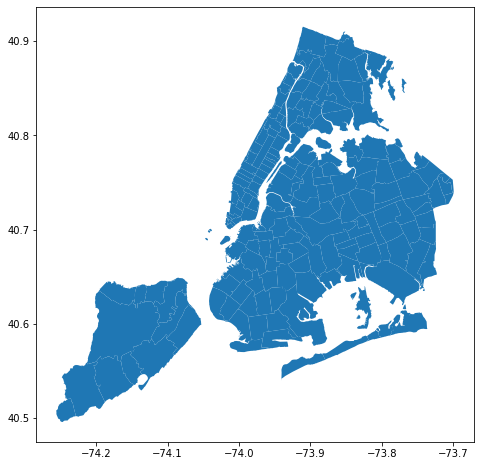

In [ ]:
NYCzip.plot(figsize=(8,8))


In [ ]:
NYCzip.drop_duplicates(subset=['ZIP CODE'], inplace=True)
ZIP_VIZ = change_zip_PPSF.merge(NYCzip, right_on = ['ZIP CODE'],left_on = ['ZIP CODE'] )


In [ ]:
ZIP_VIZ = gpd.GeoDataFrame(ZIP_VIZ, geometry = 'geometry',crs={'init': 'epsg:4326'})


In [ ]:
! pip install mapclassify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


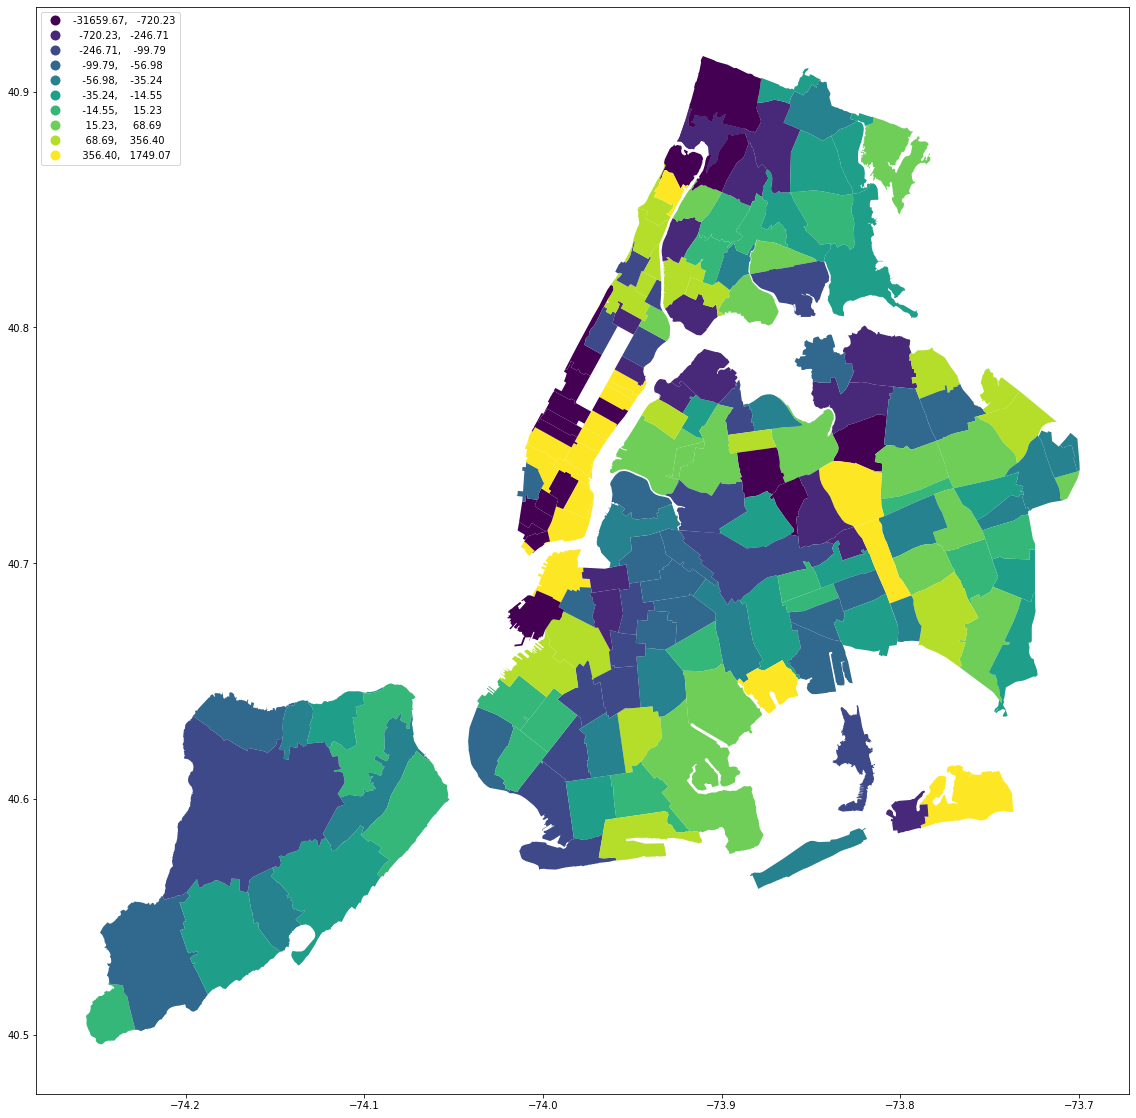

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, figsize=(20,20))

ZIP_VIZ.plot(ax=ax,column = 'Change_20',k=10, scheme='Quantiles', legend=True, 
              legend_kwds={'loc': 'upper left'})

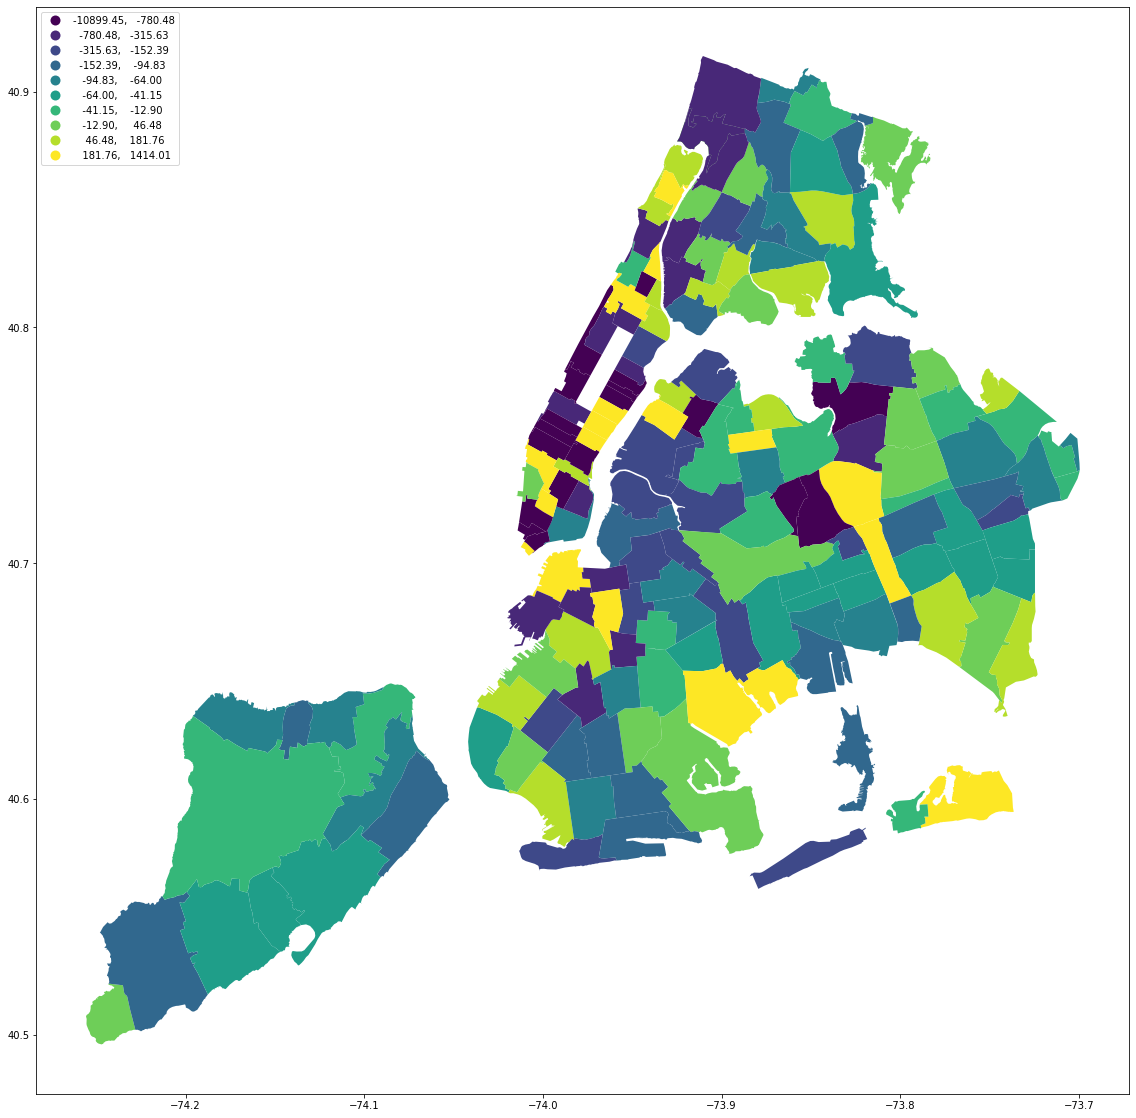

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, figsize=(20,20))

ZIP_VIZ.plot(ax=ax,column = 'Change_21',k=10, scheme='Quantiles', legend=True, 
              legend_kwds={'loc': 'upper left'})